In [102]:
from medgan_model import Medgan
from Data_loader import load_car_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
from sklearn.model_selection import KFold

In [103]:
from medgan_model import Medgan
from Data_loader import load_car_data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold


In [104]:
# --- Load and preprocess real shuttle data ---
df = pd.read_csv("F:\\Assisgments\\team project A\\Models\\MedGAN Areeb\\Datasets\\car_encoded.csv", header=None)
X_real = df.iloc[:, :-1]
y_real = df.iloc[:, -1]

In [105]:
# --- Load Data ---
X_train, X_test = load_car_data("F:\\Assisgments\\team project A\\Models\\MedGAN Areeb\\Datasets\\car_encoded.csv", test_size=0.2, n_shuffle=10)
input_dim = X_train.shape[1]


In [106]:
# --- Apply 5-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n===== Fold {fold+1} of 5 =====")
    
    # Prepare train and validation split
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    
    # Now use X_tr for training instead of X_train


===== Fold 1 of 5 =====

===== Fold 2 of 5 =====

===== Fold 3 of 5 =====

===== Fold 4 of 5 =====

===== Fold 5 of 5 =====


In [107]:
# --- Initialize and Train MedGAN ---
medgan = Medgan(input_dim=input_dim, ae_loss_type='bce')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)
batch_size = 64
n_epochs = 300

for epoch in range(n_epochs):
    np.random.shuffle(X_tr)
    for i in range(0, len(X_tr), batch_size):
        batch = X_tr[i:i + batch_size]
        noise = np.random.normal(size=(batch.shape[0], medgan.random_dim))
        medgan.train_step(batch, noise)
    print(f"Epoch {epoch+1}/{n_epochs} completed")

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/300 completed
Epoch 2/300 completed
Epoch 3/300 completed
Epoch 4/300 completed
Epoch 5/300 completed
Epoch 6/300 completed
Epoch 7/300 completed
Epoch 8/300 completed
Epoch 9/300 completed
Epoch 10/300 completed
Epoch 11/300 completed
Epoch 12/300 completed
Epoch 13/300 completed
Epoch 14/300 completed
Epoch 15/300 completed
Epoch 16/300 completed
Epoch 17/300 completed
Epoch 18/300 completed
Epoch 19/300 completed
Epoch 20/300 completed
Epoch 21/300 completed
Epoch 22/300 completed
Epoch 23/300 completed
Epoch 24/300 completed
Epoch 25/300 completed
Epoch 26/300 completed
Epoch 27/300 completed
Epoch 28/300 completed
Epoch 29/300 completed
Epoch 30/300 completed
Epoch 31/300 completed
Epoch 32/300 completed
Epoch 33/300 completed
Epoch 34/300 completed
Epoch 35/300 completed
Epoch 36/300 completed
Epoch 37/300 completed
Epoch 38/300 completed
Epoch 39/300 completed
Epoch 40/300 completed
Epoch 41/300 completed
Epoch 42/300 completed
Epoch 43/300 completed
Epoch 44/300 complet

In [108]:
medgan = Medgan(input_dim=input_dim, ae_loss_type='bce')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002)

In [109]:
# --- Apply 5-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n===== Fold {fold+1} of 5 =====")
    
    # Prepare train and validation split
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    
    # Now use X_tr for training instead of X_train


===== Fold 1 of 5 =====

===== Fold 2 of 5 =====

===== Fold 3 of 5 =====

===== Fold 4 of 5 =====

===== Fold 5 of 5 =====


In [110]:
# --- Training Loop ---
ae_losses, d_losses, g_losses = [], [], []

for epoch in range(n_epochs):
    np.random.shuffle(X_tr)
    for i in range(0, len(X_tr), batch_size):
        batch = X_tr[i:i + batch_size]
        noise = np.random.normal(size=(batch.shape[0], medgan.random_dim))
        ae_loss, d_loss, g_loss = medgan.train_step(batch, noise)

    ae_losses.append(ae_loss.numpy())
    d_losses.append(d_loss.numpy())
    g_losses.append(g_loss.numpy())

    print(f"Epoch {epoch + 1}/{n_epochs} | AE: {ae_loss:.4f}, D: {d_loss:.4f}, G: {g_loss:.4f}")

Epoch 1/300 | AE: 0.7048, D: 1.4458, G: 0.5920
Epoch 2/300 | AE: 0.7040, D: 1.4430, G: 0.5992
Epoch 3/300 | AE: 0.7033, D: 1.4393, G: 0.5974
Epoch 4/300 | AE: 0.7054, D: 1.4352, G: 0.5981
Epoch 5/300 | AE: 0.7019, D: 1.4366, G: 0.5909
Epoch 6/300 | AE: 0.7055, D: 1.4433, G: 0.5873
Epoch 7/300 | AE: 0.7059, D: 1.4520, G: 0.5922
Epoch 8/300 | AE: 0.7038, D: 1.4698, G: 0.5965
Epoch 9/300 | AE: 0.7011, D: 1.4403, G: 0.5937
Epoch 10/300 | AE: 0.7035, D: 1.4503, G: 0.5940
Epoch 11/300 | AE: 0.7025, D: 1.4719, G: 0.5921
Epoch 12/300 | AE: 0.7013, D: 1.4414, G: 0.5980
Epoch 13/300 | AE: 0.7022, D: 1.4566, G: 0.6007
Epoch 14/300 | AE: 0.7024, D: 1.4743, G: 0.5920
Epoch 15/300 | AE: 0.7040, D: 1.4823, G: 0.5881
Epoch 16/300 | AE: 0.7013, D: 1.4558, G: 0.5930
Epoch 17/300 | AE: 0.7037, D: 1.4528, G: 0.5937
Epoch 18/300 | AE: 0.7011, D: 1.4603, G: 0.5979
Epoch 19/300 | AE: 0.7037, D: 1.4461, G: 0.5940
Epoch 20/300 | AE: 0.7013, D: 1.4314, G: 0.6006
Epoch 21/300 | AE: 0.6956, D: 1.4373, G: 0.5960
E

In [111]:
# --- Define X_train_real and related preprocessing variables ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("F:\\Assisgments\\team project A\\Models\\MedGAN Areeb\\Datasets\\car_encoded.csv", header=None)
X_real = df.iloc[:, :-1]
y_real = df.iloc[:, -1]

le = LabelEncoder()
y_encoded = le.fit_transform(y_real)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

from sklearn.model_selection import KFold

In [112]:
# Generate Synthetic Data
synthetic_data = medgan.generate_data(num_samples=len(X_train_real))


In [113]:
# --- Generate Synthetic Data ---
synthetic_data = medgan.generate_data(num_samples=1000)
print("Generated Data Shape:", synthetic_data.shape)

Generated Data Shape: (1000, 25)


In [114]:
# Encode target for XGBClassifier
le = LabelEncoder()
y_encoded = le.fit_transform(y_real)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_real)

# Train-test split
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [115]:
# --- Classifier Evaluation ---
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "MLP Classifier": MLPClassifier(max_iter=300, random_state=42),
    "XGB Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=300, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_real, y_train_real)
    y_pred = model.predict(X_test_real)
    results[name] = {
        "Accuracy": accuracy_score(y_test_real, y_pred),
        "Precision": precision_score(y_test_real, y_pred, average='macro', zero_division=0),
        "Recall": recall_score(y_test_real, y_pred, average='macro', zero_division=0),
        "F1 Score": f1_score(y_test_real, y_pred, average='macro', zero_division=0)
    }

results_df = pd.DataFrame(results).T
print("\nClassifier Evaluation on Real Data:")
print(results_df)

c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\hp\anaconda3\envs\tf_env\lib\site-packages\xgboost\core.py:158: UserWarning: [15:28:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classifier Evaluation on Real Data:
                     Accuracy  Precision    Recall  F1 Score
Random Forest        0.968208   0.925595  0.933047  0.923287
MLP Classifier       0.962428   0.953788  0.926637  0.936978
XGB Classifier       0.979769   0.923718  0.939352  0.923628
Logistic Regression  0.687861   0.337710  0.332295  0.324503


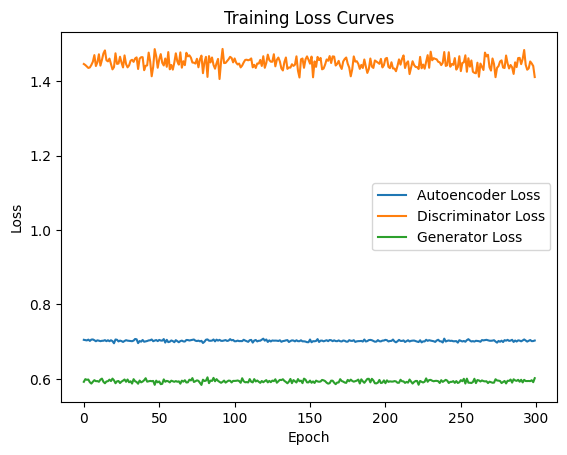

In [116]:
# --- Plot Losses ---
plt.plot(ae_losses, label='Autoencoder Loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.plot(g_losses, label='Generator Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss Curves")
plt.show()